In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = '1J05tsCBwdhEwkXygcbpKNztsXA6qErPC'
#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [3]:

!pip install vaderSentiment
!pip install langdetect



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=6c0d47770bc0a70775e178dad1bf058aaf2af8fe380b482c66e168744cd38985
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


**YAHOO FINANCE**

In [7]:
try:
    from urllib.request import urlopen
except ImportError:
    from urllib2 import urlopen
try:
    from urllib.parse import urlencode
except ImportError:
    from urllib import urlencode

from json import loads

# Yahoo! YQL API
PUBLIC_API_URL = 'https://query.yahooapis.com/v1/public/yql'
OAUTH_API_URL = 'https://query.yahooapis.com/v1/yql'
DATATABLES_URL = 'store://datatables.org/alltableswithkeys'


class YQLQuery(object):

    def execute(self, yql, token=None):
        req = urlopen(PUBLIC_API_URL + '?' + urlencode({
            'q': yql,
            'format': 'json',
            'env': DATATABLES_URL
        }))
        return loads(req.read())

In [6]:
!pip install yfinance
import yfinance as yf

tickers = ["MS", "JPM", "ML", "GS"]
data = yf.download(tickers)

print(data)

[*********************100%%**********************]  4 of 4 completed

Price        Adj Close                                          Close  \
Ticker              GS         JPM         ML          MS          GS   
Date                                                                    
1980-03-17         NaN    1.071496        NaN         NaN         NaN   
1980-03-18         NaN    1.079376        NaN         NaN         NaN   
1980-03-19         NaN    1.095133        NaN         NaN         NaN   
1980-03-20         NaN    1.087253        NaN         NaN         NaN   
1980-03-21         NaN    1.110890        NaN         NaN         NaN   
...                ...         ...        ...         ...         ...   
2024-07-30  505.670013  215.190002  65.639999  102.834999  505.670013   
2024-07-31  509.029999  212.800003  68.919998  103.209999  509.029999   
2024-08-01  500.119995  207.960007  64.889999  101.760002  500.119995   
2024-08-02  470.640015  199.139999  62.000000   95.849998  470.640015   
2024-08-05  459.019989  194.899994  59.700001   92.

In [9]:
import pandas as pd

gs_yf = pd.DataFrame()
gs_yf['Close']= data['Close']['GS'].values
gs_yf['Open']=data['Open']['GS'].values
gs_yf['Volume']=data['Volume']['GS'].values
gs_yf['company']='GS'
gs_yf['Date']=data.index
gs_yf

,Close,Open,Volume,company,Date
0,NaN,NaN,NaN,GS,1980-03-17
1,NaN,NaN,NaN,GS,1980-03-18
2,NaN,NaN,NaN,GS,1980-03-19
3,NaN,NaN,NaN,GS,1980-03-20
4,NaN,NaN,NaN,GS,1980-03-21
...,...,...,...,...,...
11185,505.670013,498.309998,2642500.0,GS,2024-07-30
11186,509.029999,504.859985,2658900.0,GS,2024-07-31
11187,500.119995,510.000000,4006800.0,GS,2024-08-01
11188,470.640015,491.100006,6114400.0,GS,2024-08-02


In [14]:
ms_yf = pd.DataFrame()
ms_yf['Close']= data['Close']['MS'].values
ms_yf['Open']=data['Open']['MS'].values
ms_yf['Volume']=data['Volume']['MS'].values
ms_yf['company']='MS'
ms_yf['Date']=data.index
ms_yf

,Close,Open,Volume,company,Date
0,NaN,NaN,NaN,MS,1980-03-17
1,NaN,NaN,NaN,MS,1980-03-18
2,NaN,NaN,NaN,MS,1980-03-19
3,NaN,NaN,NaN,MS,1980-03-20
4,NaN,NaN,NaN,MS,1980-03-21
...,...,...,...,...,...
11185,103.760002,103.559998,6225500.0,MS,2024-07-30
11186,103.209999,103.080002,5444600.0,MS,2024-07-31
11187,101.760002,103.750000,5678100.0,MS,2024-08-01
11188,95.849998,99.000000,11117900.0,MS,2024-08-02


In [15]:
ml_yf = pd.DataFrame()
ml_yf['Close']= data['Close']['ML'].values
ml_yf['Open']=data['Open']['ML'].values
ml_yf['Volume']=data['Volume']['ML'].values
ml_yf['company']='ML'
ml_yf['Date']=data.index
ml_yf

,Close,Open,Volume,company,Date
0,NaN,NaN,NaN,ML,1980-03-17
1,NaN,NaN,NaN,ML,1980-03-18
2,NaN,NaN,NaN,ML,1980-03-19
3,NaN,NaN,NaN,ML,1980-03-20
4,NaN,NaN,NaN,ML,1980-03-21
...,...,...,...,...,...
11185,65.639999,67.559998,129900.0,ML,2024-07-30
11186,68.919998,66.930000,163100.0,ML,2024-07-31
11187,64.889999,68.839996,145000.0,ML,2024-08-01
11188,62.000000,60.700001,186200.0,ML,2024-08-02


In [16]:
jpm_yf = pd.DataFrame()
jpm_yf['Close']= data['Close']['JPM'].values
jpm_yf['Open']=data['Open']['JPM'].values
jpm_yf['Volume']=data['Volume']['JPM'].values
jpm_yf['company']='JPM'
jpm_yf['Date']=data.index
jpm_yf

,Close,Open,Volume,company,Date
0,5.037037,0.000000,62775,JPM,1980-03-17
1,5.074074,0.000000,64125,JPM,1980-03-18
2,5.148148,0.000000,40500,JPM,1980-03-19
3,5.111111,0.000000,18900,JPM,1980-03-20
4,5.222222,0.000000,97200,JPM,1980-03-21
...,...,...,...,...,...
11185,215.190002,213.229996,8850700,JPM,2024-07-30
11186,212.800003,214.779999,9071600,JPM,2024-07-31
11187,207.960007,213.199997,10918600,JPM,2024-08-01
11188,199.139999,203.880005,18038300,JPM,2024-08-02


In [17]:
jpm_yf

,Close,Open,Volume,company,Date
0,5.037037,0.000000,62775,JPM,1980-03-17
1,5.074074,0.000000,64125,JPM,1980-03-18
2,5.148148,0.000000,40500,JPM,1980-03-19
3,5.111111,0.000000,18900,JPM,1980-03-20
4,5.222222,0.000000,97200,JPM,1980-03-21
...,...,...,...,...,...
11185,215.190002,213.229996,8850700,JPM,2024-07-30
11186,212.800003,214.779999,9071600,JPM,2024-07-31
11187,207.960007,213.199997,10918600,JPM,2024-08-01
11188,199.139999,203.880005,18038300,JPM,2024-08-02


In [18]:
yfin_data = pd.concat([gs_yf.reset_index(drop=True),
                       ml_yf.reset_index(drop=True),
                       ms_yf.reset_index(drop=True),
                       jpm_yf.reset_index(drop=True)],axis=0, ignore_index=False)
# Set ignore_index=True to create a new unique index for the concatenated DataFrame.

In [ ]:
yfin_data

,Close,Open,Volume,company,Date
0,NaN,NaN,NaN,GS,1980-03-17
1,NaN,NaN,NaN,GS,1980-03-18
2,NaN,NaN,NaN,GS,1980-03-19
3,NaN,NaN,NaN,GS,1980-03-20
4,NaN,NaN,NaN,GS,1980-03-21
...,...,...,...,...,...
11180,210.330002,211.020004,5557300.0,JPM,2024-07-23
11181,208.589996,209.550003,7119000.0,JPM,2024-07-24
11182,208.669998,208.649994,6403800.0,JPM,2024-07-25
11183,212.240005,209.240005,8027300.0,JPM,2024-07-26


In [19]:
yfin=yfin_data[(yfin_data['Date'] > '2018-01-01') & (yfin_data['Date'] < '2020-04-30')]

In [20]:
yfin.head()

,Close,Open,Volume,company,Date
9532,255.669998,257.769989,2258300.0,GS,2018-01-02
9533,253.289993,255.479996,2988200.0,GS,2018-01-03
9534,256.829987,255.229996,2583200.0,GS,2018-01-04
9535,255.520004,257.179993,2594700.0,GS,2018-01-05
9536,251.809998,254.750000,2940500.0,GS,2018-01-08


###TWITTER DATA###

In [21]:
# prompt: Load data from google drive for JP Morgan Chase

from google.colab import drive
drive.mount('/content/drive')

# Replace 'path/to/your/file.csv' with the actual path to your file in Google Drive
file_path = '/content/drive/My Drive/DataMiningProject/Tweets/'

import pandas as pd

df_jp_wm_complaint = pd.read_json(file_path+'jp_tweets_complaint.json')
df_jp_wm_feedback = pd.read_json(file_path+'jp_tweets_feedback.json')
df_jp_wm_feedback.head()
df_jp_wm_request = pd.read_json(file_path+'jp_tweets_request.json')
df_jp_wm = pd.concat([df_jp_wm_complaint,df_jp_wm_feedback,df_jp_wm_request])

Mounted at /content/drive


In [22]:
# prompt: Load data from google drive for Goldman Sachs

from google.colab import drive
drive.mount('/content/drive')

# Replace 'path/to/your/file.csv' with the actual path to your file in Google Drive
file_path = '/content/drive/My Drive/DataMiningProject/Tweets/'

import pandas as pd

df_gs_wm_complaint = pd.read_json(file_path+'gs_tweets_complaints.json')
df_gs_wm_feedback = pd.read_json(file_path+'gs_tweets_feedback.json')
df_gs_wm_feedback.head()
df_gs_wm_request = pd.read_json(file_path+'gs_tweets_request.json')
df_gs_wm = pd.concat([df_gs_wm_complaint,df_gs_wm_feedback,df_gs_wm_request])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# prompt: Load data from google drive for Merryl Lynch

from google.colab import drive
drive.mount('/content/drive')

# Replace 'path/to/your/file.csv' with the actual path to your file in Google Drive
file_path = '/content/drive/My Drive/DataMiningProject/Tweets/'

import pandas as pd

df_ml_wm_complaint = pd.read_json(file_path+'ml_tweets_complaint.json')
df_ml_wm_feedback = pd.read_json(file_path+'ml_tweets_feedback.json')
df_ml_wm_feedback.head()
df_ml_wm_request = pd.read_json(file_path+'ml_tweets_request.json')
df_ml_wm = pd.concat([df_ml_wm_complaint,df_ml_wm_feedback,df_ml_wm_request])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# prompt: Load data from google drive for Morgan Stanley

from google.colab import drive
drive.mount('/content/drive')

# Replace 'path/to/your/file.csv' with the actual path to your file in Google Drive
file_path = '/content/drive/My Drive/DataMiningProject/Tweets/'

import pandas as pd

df_ms_wm_complaint = pd.read_json(file_path+'ms_tweets_complaint.json')
df_ms_wm_feedback = pd.read_json(file_path+'ms_tweets_feedback.json')
df_ms_wm_feedback.head()
df_ms_wm_request = pd.read_json(file_path+'ms_tweets_request.json')
df_ms_wm = pd.concat([df_ms_wm_complaint,df_ms_wm_feedback,df_ms_wm_request])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
df_jp_wm = df_jp_wm.assign(company = "JPM")

df_gs_wm = df_gs_wm.assign(company = "GS")

df_ml_wm = df_ml_wm.assign(company = "ML")

df_ms_wm = df_gs_wm.assign(company = "MS")

In [26]:
df_all_wm = pd.concat([df_jp_wm,df_gs_wm,df_ml_wm,df_ms_wm])

In [27]:
#Sentiment Analysis
#Vader Sentiment

In [28]:
# prompt: Import VaderSentiment package
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [29]:
analyzer = SentimentIntensityAnalyzer()
sentiment = df_all_wm['text'].apply(lambda x: analyzer.polarity_scores(x))

In [30]:
#Inserting the sentiment into the dataframe
df_all_wm = pd.concat([df_all_wm.reset_index(drop=True),
                       sentiment.apply(pd.Series).reset_index(drop=True)],
                       axis=1)

In [31]:
df_all_wm['date'] = df_all_wm['timestamp'].apply(lambda x: x.date())

In [32]:
#Filter = df_all_wm['text'].apply(lambda x: 'jp' in x.lower())
#df_filter = df_all_wm[Filter]
#df_filter.shape
df_filter = df_all_wm

In [33]:
df_filter.head()


,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,...,tweet_url,user_id,username,video_url,company,neg,neu,pos,compound,date
0,True,"[Retaliation, lawsuit, racism, TakeAStance, EE...",[https://pbs.twimg.com/media/Dl2AmSoV4Acz-BE.jpg],False,False,0,[],,0,[],...,/Candice_Lue/status/1035124975764754432,827318424904794112,Candice Lue,,JPM,0.124,0.876,0.000,-0.7003,2018-08-30
1,False,[],[],False,True,1,[],1028362938787262465,0,"[{'screen_name': 'NurseRabbi', 'user_id': '307...",...,/NurseRabbi/status/1028705490887421953,3075653521,Nurse Rabbi,,JPM,0.192,0.719,0.089,-0.7405,2018-08-12
2,False,[],[],False,False,2,[http://www.artfixdaily.com/news_feed/2018/08/...,,0,[],...,/andthatrhymeswi/status/1027916790314229760,133266548,Albert Henderson,,JPM,0.091,0.807,0.102,0.1049,2018-08-10
3,False,[],[],True,False,0,[https://www.vanityfair.com/news/2017/09/jamie...,,1,[],...,/NeedaHobby1/status/1023661100913459200,195195397,Need A Hobby,,JPM,0.213,0.675,0.112,-0.7627,2018-07-29
4,True,"[Retaliation, lawsuit, racism, TakeAStance, EE...",[https://pbs.twimg.com/media/Dl2AmSoV4Acz-BE.jpg],False,False,0,[],,0,[],...,/Candice_Lue/status/1035124975764754432,827318424904794112,Candice Lue,,JPM,0.124,0.876,0.000,-0.7003,2018-08-30


In [34]:
import plotly.express as pltx
import matplotlib.pyplot as plt

In [35]:
df_filter.groupby('date').mean(['compound]']).values.mean()

1.160636490342273e+17

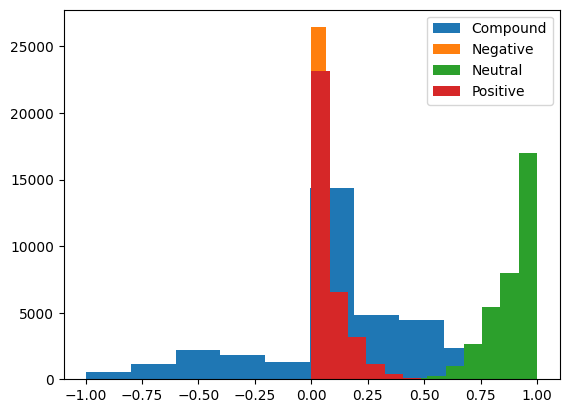

In [37]:

plt.hist(df_filter['compound'].values, label = 'Compound')
plt.hist(df_filter['neg'].values, label = 'Negative')
plt.hist(df_filter['neu'].values, label = 'Neutral')
plt.hist(df_filter['pos'].values, label = 'Positive')

plt.legend(loc = 'best')

In [38]:
df_wm_sent_jp = df_all_wm[df_all_wm['company'] == 'JPM']
df_wm_sent_jp.head(10)

df_wm_sent_ms = df_all_wm[df_all_wm['company'] == 'MS']
df_wm_sent_ms.head(10)

df_wm_sent_ml = df_all_wm[df_all_wm['company'] == 'ML']
df_wm_sent_ml.head(10)

df_wm_sent_gs = df_all_wm[df_all_wm['company'] == 'GS']
df_wm_sent_gs.head(10)



df_all_wm_com = df_all_wm.groupby('company')['compound'].mean()
df_all_wm_neu = df_all_wm.groupby('company')['neu'].mean()
df_all_wm_neg = df_all_wm.groupby('company')['neg'].mean()
df_all_wm_pos = df_all_wm.groupby('company')['pos'].mean()


# Grouped bar plot with seaborn
import seaborn as sns





<Axes: xlabel='compound', ylabel='company'>

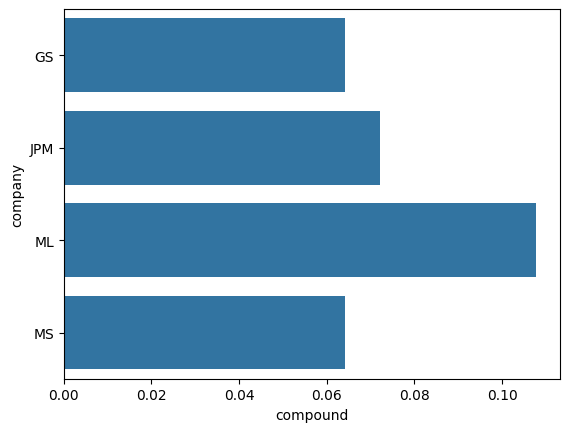

In [39]:
df_all_wm_com = pd.DataFrame(df_all_wm_com)
df_all_wm_com = df_all_wm_com.reset_index()
sns.barplot(y='company',x='compound',data=df_all_wm_com)

<Axes: xlabel='neu', ylabel='company'>

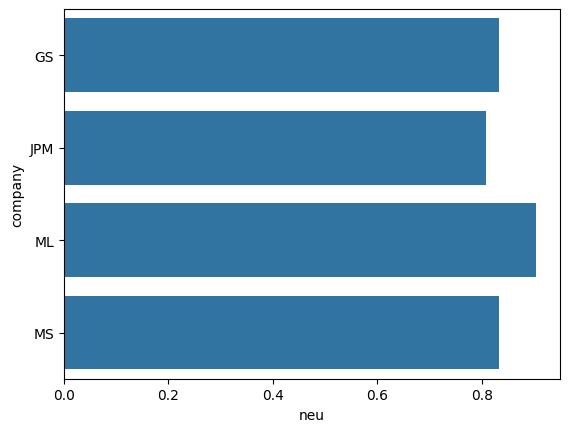

In [40]:
df_all_wm_neu = pd.DataFrame(df_all_wm_neu)
df_all_wm_neu = df_all_wm_neu.reset_index()
sns.barplot(y='company',x='neu',data=df_all_wm_neu)

<Axes: xlabel='neg', ylabel='company'>

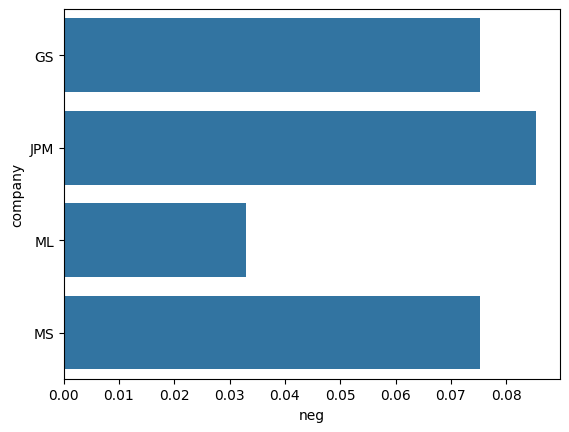

In [41]:
df_all_wm_neg = pd.DataFrame(df_all_wm_neg)
df_all_wm_neg = df_all_wm_neg.reset_index()
sns.barplot(y='company',x='neg',data=df_all_wm_neg)

<Axes: xlabel='pos', ylabel='company'>

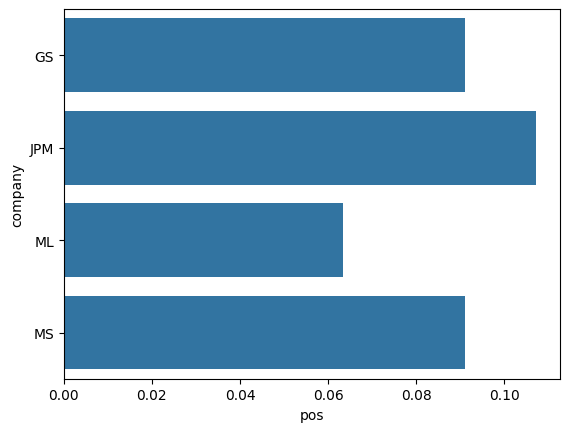

In [42]:
df_all_wm_pos = pd.DataFrame(df_all_wm_pos)
df_all_wm_pos = df_all_wm_pos.reset_index()
sns.barplot(y='company',x='pos',data=df_all_wm_pos)

### MERGE TWITTER DATA AND YAHOO FINANCE DATA ###

In [43]:
df_all_wm

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,...,tweet_url,user_id,username,video_url,company,neg,neu,pos,compound,date
0,True,"[Retaliation, lawsuit, racism, TakeAStance, EE...",[https://pbs.twimg.com/media/Dl2AmSoV4Acz-BE.jpg],False,False,0,[],,0,[],...,/Candice_Lue/status/1035124975764754432,827318424904794112,Candice Lue,,JPM,0.124,0.876,0.000,-0.7003,2018-08-30
1,False,[],[],False,True,1,[],1028362938787262465,0,"[{'screen_name': 'NurseRabbi', 'user_id': '307...",...,/NurseRabbi/status/1028705490887421953,3075653521,Nurse Rabbi,,JPM,0.192,0.719,0.089,-0.7405,2018-08-12
2,False,[],[],False,False,2,[http://www.artfixdaily.com/news_feed/2018/08/...,,0,[],...,/andthatrhymeswi/status/1027916790314229760,133266548,Albert Henderson,,JPM,0.091,0.807,0.102,0.1049,2018-08-10
3,False,[],[],True,False,0,[https://www.vanityfair.com/news/2017/09/jamie...,,1,[],...,/NeedaHobby1/status/1023661100913459200,195195397,Need A Hobby,,JPM,0.213,0.675,0.112,-0.7627,2018-07-29
4,True,"[Retaliation, lawsuit, racism, TakeAStance, EE...",[https://pbs.twimg.com/media/Dl2AmSoV4Acz-BE.jpg],False,False,0,[],,0,[],...,/Candice_Lue/status/1035124975764754432,827318424904794112,Candice Lue,,JPM,0.124,0.876,0.000,-0.7003,2018-08-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34474,False,[],[],True,True,0,[],1191952939637788674,1,"[{'screen_name': 'MsEducationofCB', 'user_id':...",...,/mle_goldman/status/1192011186281287680,2837495417,Emily Claire Goldman,,MS,0.118,0.793,0.090,-0.2617,2019-11-06
34475,False,[],[],True,False,13,[https://www.reuters.com/article/us-usa-trump-...,,1,[],...,/mle_goldman/status/1191479347334520832,2837495417,Emily Claire Goldman,,MS,0.000,1.000,0.000,0.0000,2019-11-04
34476,False,[],[],True,True,0,[],1190374690843496452,1,"[{'screen_name': 'marcus', 'user_id': '8170786...",...,/ToddJTP/status/1190415199632838657,530977609,JT Todd,,MS,0.000,0.941,0.059,0.4215,2019-11-01
34477,False,[],[],True,True,0,[],1187400855873568770,1,"[{'screen_name': 'TerrysTweets7', 'user_id': '...",...,/TerrysTweets7/status/1187716615741284354,375472411,JustMe,,MS,0.000,1.000,0.000,0.0000,2019-10-25


#### MERGE TWITTER DATA AND YAHOO FINANCE ####

In [78]:
# Convert 'date' column in df_all_wm to datetime
df_all_wm['date'] = pd.to_datetime(df_all_wm['date'])

import pandas as pd
yfin['Date'] = pd.to_datetime(yfin['Date'])

# Now perform the merge
df_X = df_all_wm.merge(yfin, left_on=['company','date'], right_on=['company','Date'])

<ipython-input-78-35c195d31289>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yfin['Date'] = pd.to_datetime(yfin['Date'])


In [83]:
df_X.head(10)

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,...,company,neg,neu,pos,compound,date,Close,Open,Volume,Date
0,True,"[Retaliation, lawsuit, racism, TakeAStance, EE...",[https://pbs.twimg.com/media/Dl2AmSoV4Acz-BE.jpg],False,False,0,[],,0,[],...,JPM,0.124,0.876,0.000,-0.7003,2018-08-30,115.190002,115.589996,8991800.0,2018-08-30
1,True,"[Retaliation, lawsuit, racism, TakeAStance, EE...",[https://pbs.twimg.com/media/Dl2AmSoV4Acz-BE.jpg],False,False,0,[],,0,[],...,JPM,0.124,0.876,0.000,-0.7003,2018-08-30,115.190002,115.589996,8991800.0,2018-08-30
2,False,[],[],False,False,2,[http://www.artfixdaily.com/news_feed/2018/08/...,,0,[],...,JPM,0.091,0.807,0.102,0.1049,2018-08-10,115.730003,115.500000,12630600.0,2018-08-10
3,False,[],[],False,False,2,[http://www.artfixdaily.com/news_feed/2018/08/...,,0,[],...,JPM,0.091,0.807,0.102,0.1049,2018-08-10,115.730003,115.500000,12630600.0,2018-08-10
4,True,[],[https://pbs.twimg.com/media/DkQyMa6XsAAlESK.jpg],False,False,0,[http://bit.ly/2KlcApc],,0,[],...,JPM,0.000,0.788,0.212,0.7644,2018-08-10,115.730003,115.500000,12630600.0,2018-08-10
5,True,[],[https://pbs.twimg.com/media/DkQyMa6XsAAlESK.jpg],False,False,0,[http://bit.ly/2KlcApc],,0,[],...,JPM,0.000,0.788,0.212,0.7644,2018-08-10,115.730003,115.500000,12630600.0,2018-08-10
6,False,"[IlhanOmar, JPMorgan, Dollar, Breakingnews, Br...",[],False,False,0,[https://infiniteunknown.net/2019/07/23/world-...,,0,[],...,JPM,0.243,0.757,0.000,-0.8720,2019-07-23,116.360001,114.879997,12752200.0,2019-07-23
7,False,"[IlhanOmar, JPMorgan, Dollar, Breakingnews, Br...",[],False,False,0,[https://infiniteunknown.net/2019/07/23/world-...,,0,[],...,JPM,0.243,0.757,0.000,-0.8720,2019-07-23,116.360001,114.879997,12752200.0,2019-07-23
8,True,[],[https://pbs.twimg.com/media/D_NRnNbU0AIPBDc.j...,True,False,0,[],,1,[],...,JPM,0.309,0.658,0.033,-0.9499,2019-07-11,114.099998,113.370003,11595200.0,2019-07-11
9,False,[],[],False,False,0,[],,0,[],...,JPM,0.040,0.719,0.241,0.8814,2019-07-11,114.099998,113.370003,11595200.0,2019-07-11


#### CNN ROUND 1 ####

In [45]:

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Prepare the data
df_X = df_X.sort_values('date')  # Sort by Date to ensure chronological order
df_X = df_X.dropna() # Drop rows with missing values

# Select features and target
features = ['Open', 'Volume', 'compound']
target = 'Close'

# Normalize the data
scaler = MinMaxScaler()
df_X[features] = scaler.fit_transform(df_X[features])

# Split the data chronologically
split_index = int(len(df_X) * 0.8)
train_data = df_X[:split_index]
test_data = df_X[split_index:]

# Prepare sequences for CNN
def create_sequences(data, seq_length):
  X, y = [], []
  for i in range(len(data) - seq_length):
    X.append(data[features].iloc[i: i + seq_length].values)
    y.append(data[target].iloc[i + seq_length])
  return np.array(X), np.array(y)

seq_length = 10  # Adjust as needed
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape input for CNN (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], len(features)))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], len(features)))

# Build the CNN model
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, len(features))))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(50, activation='relu'))
model1.add(Dense(1))  # Output layer for predicting Close price

# Compile the model
model1.compile(optimizer='adam', loss='mse')

# Train the model
model1.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on test data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 20274.9180
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7085.0254
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5444.2065
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5318.1392
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5527.7153
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5440.8071
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5493.1855
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5143.3896
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5383.2974
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5130.1792
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5164.1108
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5192.8691
Epoch 13/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5184.1606
Epoch 14/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5283.0845
Epoch 15/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

In [46]:

y_pred = model1.predict(X_test)

# Inverse transform the predictions and actual values to original scale
y_pred_original_scale = scaler.inverse_transform(np.repeat(y_pred, len(features), axis=1))[:, 0].reshape(-1, 1)  # Extract the first column (corresponding to 'Close') and reshape
y_test_original_scale = scaler.inverse_transform(np.repeat(y_test.reshape(-1, 1), len(features), axis=1))[:, 0].reshape(-1, 1)  # Extract the first column and reshape

# Calculate metrics
mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
r2 = r2_score(y_test_original_scale, y_pred_original_scale)

print('Test MSE:', mse)
print('Test RMSE:', rmse)
print('Test MAE:', mae)
print('Test R-squared:', r2)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test MSE: 238389270.44356063
Test RMSE: 15439.859793520167
Test MAE: 12830.857745316209
Test R-squared: 0.1147404253729154


##### XGBOOST REGRESSOR ####


In [88]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


df_X = df_X.sort_values('date')

from sklearn.model_selection import StratifiedKFold

# Assuming 'company' is the variable you want to stratify by
split_index = int(len(df_X) * 0.8)

# Use StratifiedKFold to ensure representation of each company in both train and test
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Adjust n_splits as needed

for train_index, test_index in skf.split(df_X, df_X['company']):
  train_data = df_X.iloc[train_index]
  test_data = df_X.iloc[test_index]
  break

# Convert date to numerical features
train_data['date_ordinal'] = train_data['date'].apply(lambda x: x.toordinal())
test_data['date_ordinal'] = test_data['date'].apply(lambda x: x.toordinal())

# One-hot encode the 'company' column
train_data = pd.get_dummies(train_data, columns=['company'])
test_data = pd.get_dummies(test_data, columns=['company'])

# Get all company columns that are present in both training and testing data
common_company_columns = list(set(train_data.columns) & set(test_data.columns) &
                           {'company_GS', 'company_JPM', 'company_ML', 'company_MS'})

# Prepare data for XGBoost with date and company
features = ['Open', 'Volume', 'compound', 'date_ordinal'] + common_company_columns # Include common company columns

X_train = train_data[features]
y_train = train_data['Close']
X_test = test_data[features]
y_test = test_data['Close']

# Check for and handle invalid values in BOTH y_train and y_test
# Replace infinities with a large finite number
y_train = y_train.replace([np.inf, -np.inf], np.finfo(np.float64).max)
y_test = y_test.replace([np.inf, -np.inf], np.finfo(np.float64).max)

# Fill missing values (NaN) with the mean of the respective columns
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean()) # Fill NaN values in y_test

# Create and train the XGBoost model
model2 = xgb.XGBRegressor(objective='reg:squarederror')  # Specify the objective for regression
model2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model2.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Test MSE:', mse)
print('Test RMSE:', rmse)
print('Test MAE:', mae)
print('Test R-squared:', r2)

<ipython-input-88-f1f39df1122b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['date_ordinal'] = train_data['date'].apply(lambda x: x.toordinal())
<ipython-input-88-f1f39df1122b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['date_ordinal'] = test_data['date'].apply(lambda x: x.toordinal())


Test MSE: 0.1273050022702097
Test RMSE: 0.3567982655089703
Test MAE: 0.2738399443173581
Test R-squared: 0.9997856478812729


##### CNN TRAINING AND TEST TO BEAT XGB REGRESSION WITH HYPER PARAMETER TUNING ###########

In [48]:

import numpy as np
# Prepare the data
df_X = df_X.sort_values('date')  # Sort by Date to ensure chronological order
df_X = df_X.dropna() # Drop rows with missing values

# Select features and target
features = ['Open', 'Volume', 'compound']
target = 'Close'

# Normalize the data
scaler = MinMaxScaler()
df_X[features] = scaler.fit_transform(df_X[features])

# Split the data chronologically
split_index = int(len(df_X) * 0.8)
train_data = df_X[:split_index]
test_data = df_X[split_index:]

# Prepare sequences for CNN
def create_sequences(data, seq_length):
  X, y = [], []
  for i in range(len(data) - seq_length):
    X.append(data[features].iloc[i: i + seq_length].values)
    y.append(data[target].iloc[i + seq_length])
  return np.array(X), np.array(y)

# Hyperparameter tuning loop
best_r2 = 0
best_params = {}

for seq_length in [5, 10, 15]:  # Adjust sequence lengths to try
  for filters in [32, 64, 128]:  # Adjust number of filters
    for epochs in [30, 50, 70]:  # Adjust number of epochs
      for batch_size in [16, 32, 64]:  # Adjust batch size

        # Create sequences
        X_train, y_train = create_sequences(train_data, seq_length)
        X_test, y_test = create_sequences(test_data, seq_length)

        # Reshape input for CNN (samples, time steps, features)
        X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], len(features)))
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], len(features)))

        # Build the CNN model
        model = Sequential()
        model.add(Conv1D(filters=filters, kernel_size=3, activation='relu', input_shape=(seq_length, len(features))))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
        model.add(Dense(50, activation='relu'))
        model.add(Dense(1))  # Output layer for predicting Close price

        # Compile the model
        model.compile(optimizer='adam', loss='mse')

        # Train the model
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)  # Set verbose=0 to suppress training output

        # Evaluate the model on test data
        y_pred = model.predict(X_test)

        # Inverse transform the predictions and actual values to original scale
        y_pred_original_scale = scaler.inverse_transform(np.repeat(y_pred, len(features), axis=1))[:, 0].reshape(-1, 1)
        y_test_original_scale = scaler.inverse_transform(np.repeat(y_test.reshape(-1, 1), len(features), axis=1))[:, 0].reshape(-1, 1)

        # Calculate metrics
        mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
        r2 = r2_score(y_test_original_scale, y_pred_original_scale)

        # Check if this model is better
        if r2 > best_r2:
          best_r2 = r2
          best_params = {'seq_length': seq_length, 'filters': filters, 'epochs': epochs, 'batch_size': batch_size}

          # Print results for the best model so far
          print('Current Best Parameters:', best_params)
          print('Test MSE:', mse)
          print('Test RMSE:', rmse)
          print('Test MAE:', mae)
          print('Test R-squared:', r2)

          # Stop if R-squared is above 0.98
          if best_r2 > 0.98:
            break

      if best_r2 >  0.9852903190375164:
        break
    if best_r2 >  0.9852903190375164:
      break
  if best_r2 > 0.9852903190375164:
    break

print("\nFinal Best Parameters:", best_params)
print('Final Best R-squared:', best_r2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyboardInterrupt: 

###Train the text data on a transformer and then predict the compounnd sentiment based on a future date###

In [49]:


!pip install transformers torch

import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# Prepare the data
df_X = df_X.sort_values('date')  # Sort by Date to ensure chronological order
df_X = df_X.dropna() # Drop rows with missing values

# Select features and target
texts = df_X['text'].tolist()
labels = df_X['compound'].tolist()

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1)  # 1 output for regression

# Tokenize the input texts
encodings = tokenizer(texts, truncation=True, padding=True, max_length=128)  # Adjust max_length as needed

# Create a custom dataset
class TextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create dataset and dataloaders
dataset = TextDataset(encodings, labels)
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# Set up optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model.train()

for epoch in range(3):  # Adjust number of epochs as needed
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].unsqueeze(1).float().to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()



  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Enter a date (YYYY-MM-DD) or 'quit' to exit: 2023-12-12
Predicted compound sentiment for 2023-12-12: 0.44942983984947205


KeyboardInterrupt: Interrupted by user

In [50]:
import pickle

# Save the model
model_save_path = '/content/drive/My Drive/DataMiningProject/bert_sentiment_model.pkl'
with open(model_save_path, 'wb') as f:
  pickle.dump(model, f)

# Load the model
model_load_path = '/content/drive/My Drive/DataMiningProject/bert_sentiment_model.pkl'
with open(model_load_path, 'rb') as f:
  model_t = pickle.load(f)


In [95]:

# Prediction function
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt")
    inputs = {key: val.to(device) for key, val in inputs.items()}
    outputs = model_t(**inputs)
    predicted_compound = outputs.logits.item()
    return predicted_compound



In [101]:
import pandas as pd
def predict_close(confidence_interval, company, open_price, volume, compound_score, date_str):



  # Convert date string to ordinal
  date = pd.to_datetime(date_str).toordinal()

  # Create a DataFrame for the input data, ensuring all company columns are included and in the correct order
  input_data = pd.DataFrame([[open_price, volume, compound_score, date,
                             1 if company == 'GS' else 0,
                             1 if company == 'ML' else 0,
                             1 if company == 'MS' else 0,
                             1 if company == 'JPM' else 0]],\
                           columns=['Open', 'Volume', 'compound', 'date_ordinal',
                                    'company_GS', 'company_ML', 'company_MS', 'company_JPM']) # Match the column order from training

  # Make the prediction
  predicted_close = model2.predict(input_data)[0]

  margin_of_error = predicted_close * (confidence_interval / 100)
  lower_bound = predicted_close - margin_of_error
  upper_bound = predicted_close + margin_of_error

  return predicted_close, lower_bound, upper_bound

# Get user input
while True:
    confidence_interval = float(input("Enter the confidence interval (e.g., 95): "))
    if confidence_interval < 0 or confidence_interval > 100:
        print("Invalid confidence interval. Please enter a value between 0 and 100.")
        continue

    company = input("Enter the company (GS, JPM, ML, or MS): ")
    if company not in ['GS', 'JPM', 'ML', 'MS']:
        print("Invalid company. Please enter GS, JPM, ML, or MS.")
        continue

    open_price = float(input("Enter the opening price: "))
    if open_price < 0:
        print("Invalid opening price. Please enter a non-negative value.")
        continue
    volume = float(input("Enter the trading volume: "))
    if volume < 0:
        print("Invalid trading volume. Please enter a non-negative value.")
        continue
    #compound_score = float(input("Enter the compound sentiment score: "))
    date_str = input("Enter the date (YYYY-MM-DD): ")
    if not date_str:
        print("Invalid date. Please enter a valid date.")
        continue
    break


predicted_compound = predict_sentiment(company)

# Make the prediction and print results
predicted_close, lower_bound, upper_bound = predict_close(
    confidence_interval, company, open_price, volume, predicted_compound, date_str
)

print(f"Predicted closing price: {predicted_close:.2f}")
print(f"{confidence_interval}% Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")

Enter the confidence interval (e.g., 95): -0.01
Invalid confidence interval. Please enter a value between 0 and 100.
Enter the confidence interval (e.g., 95): 0.01
Enter the company (GS, JPM, ML, or MS): JPM
Enter the opening price: 500
Enter the trading volume: 10
Enter the date (YYYY-MM-DD): 2025-01-01
Predicted closing price: 260.30
0.01% Confidence Interval: [260.27, 260.33]
